In [8]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## 출력 설정

In [9]:
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [10]:
print(type(test_images))
import numpy as np
#linewidth : 한 줄에 출력될 문자의 최대 수
#set_printoptions: 부동 소수점, 어레이, 그리고 다른 NumPy 객체가 표시되는 방식을 설정합니다.
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


## 재출력

In [11]:
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

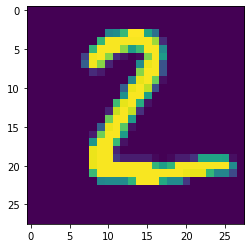

In [12]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1])

## Label 정보 출력

In [13]:
# train, test 데이터 모두 label을 가지고 있으며, 0~9의 숫자임
print(train_labels)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


## Layer 쌓기

##  tf.keras.layers.Dense
- units : 출력 값의 크기
- activation : 활성화 함수
- use_bias : 편향(b)을 사용할지 여부
- kernel_initializer : 가중치(W) 초기화 함수
- bias_iniotializer : 편향 초기화 함수
- kernel_regularizer : 가중치 정규화 방법
- bias_regularizer : 편향 정규화 방법
- activity_regularizer : 출력 값 정규화 방법
- kernel_constraint : 가중치에 적용되는 부가적인 제약 함수
- bias_constraint : 편향에 적용되는 부가적인 제약 함수

## relu  
특징:  0 이하의 값은 다음 레이어에 전달하지 않음. 0이상의 값은 그대로 출력

사용처: CNN을 학습시킬 때 많이 사용

한계점: 한번 0 활성화 값을 다음 레이어에 전달하면 이후의 뉴런들의 출력값이 모두 0이 되는 현상이 발생, 이를 dying ReLU라 부름  
이러한 한계점을 개선하기 위해 음수 출력 값을 소량이나마 다음 레이어에 전달하는 방식으로 개선한 활성화 함수들이 등장

![image](https://user-images.githubusercontent.com/59672592/126779901-d225e1c2-ac5d-4e5b-8cd5-d5fe41e60ba5.png)


In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
# 은닉층 설정
# 처음에는 입력 shape을 설정한다. 3차원 데이터를 2차원으로 변형할 것이다. input_shape=(특성의 수, 샘플의 수)
# 단, 샘플의 개수는 몇 개가 올지 알 수 없으므로 비워둬야 한다
model.add(layers.Dense(256,activation='relu',input_shape = (28*28,)))

# 출력층 설정. 숫자의 종류가 10개이므로, 10개의 유닛을 갖는 출력층을 설정한다
# 10개 각각에 대한 확률정보 출력. Softmax 층은 확률 점수를 출력한다
model.add(layers.Dense(10,activation='softmax'))

## Complie model

In [15]:
# loss: loss function. 훈련 데이터에서 신경망의 성능을 측정하는 손실 함수
# optimizer: 입력된 데이터와 손실 함수를 기반으로 가중치를 업데이트하는 방법
# metrics: 훈련과 테스트 과정을 모니터링할 지표. ‘acc’라고도 씀
#categorical_crossentropy는 다중 분류 손실함수로 one-hot encoding 클래스를 사용한다. 
#따라서 출력값이 one-hot encoding된 결과로 나오고 정답(label)과 비교하며 학습을 진행하거나 
#정확도를 알아내기 위해서는 정답(label)도 one-hot encoding된 형태여야 한다

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## 전처리 전

In [16]:
print(test_images[1,])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

## 데이터 변환

In [17]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255
# reshape 함수를 이용해 데이터를 (60000, 784) 크기로 변환하고, 
# 각 값을 255로 나누되, type을 소수점을 받는 float32 형으로 맞춤

## 전처리 후

In [18]:
np.set_printoptions(linewidth=310)
print(test_images[1])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.      

## 종속변수를 범주형을 변환

In [19]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 데이터 학습

In [23]:
# fit 메소드를 이용하여 모델을 훈련시킴
# train 데이터와 그의 label, 반복횟수 및 1번에 훈련할 데이터의 양(batch size)을 결정함
# 메모리 한계와 속도 저하 문제로 한 번에 전체 데이터를 학습하지는 않는다
# 일반적으로 8~512개의 데이터를 한 번에 학습시킨다
# 손실점수는 낮아지고, 정확도는 높아짐
# 훈련데이터에 대한 최종 정확도 98.9%
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9992
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 8.9590e-04 - accuracy: 0.

## 예측

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9810
test_acc: 0.9810000061988831
